In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup

## WTI crude oil futures
NY Mercantile - NY Mercantile Delayed Price. Currency in USD

{'F': 'Jan', 'G': 'Feb', 'H': 'Mar', 'J': 'Apr', 'K': 'May', 'M': 'Jun', 'N': 'Jul', 'Q': 'Aug', 'U': 'Sep', 'V': 'Oct', 'X': 'Nov', 'Z': 'Dec'}
[*********************100%%**********************]  36 of 36 completed


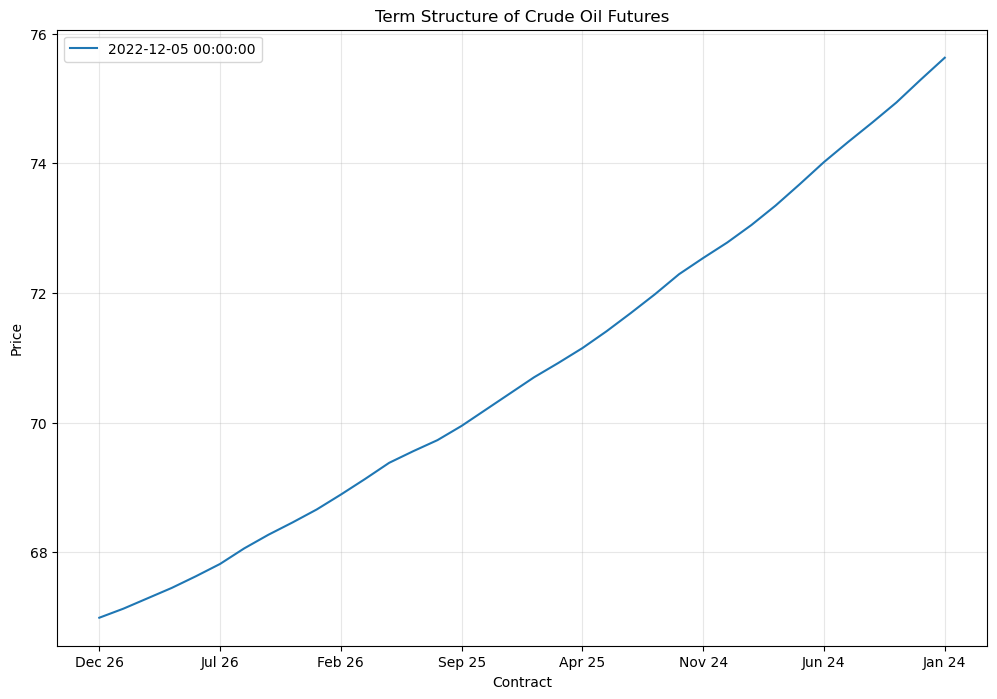

In [70]:

code = ('F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z')
month = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec')
decode = {code[i]: month[i] for i in range(12)}
print(decode)

commodity = 'CL'
exchange = 'NYM'

term_list = []

for y in ['24', '25', '26']:
    for i in range(12):
        term = commodity + code[i] + y + '.' + exchange
        term_list.append(term)


term_names = [decode[term[2]] + ' ' + term[3:5] for term in term_list]

prices = yf.download(term_list, period='1y')['Adj Close']

prices = prices[term_list].iloc[0]

# change index to term names

prices.index = term_names

prices.plot(figsize=(12, 8), legend=True)
#flip x-axis
plt.gca().invert_xaxis()
plt.title('Term Structure of Crude Oil Futures')
plt.xlabel('Contract')
plt.ylabel('Price')
plt.grid(alpha=0.3)
